In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("reviews.csv") 

In [3]:
df.shape

(1000, 2)

In [4]:
df.sample(5)

,Description,Is_Response
903,As this was a first time visit to NYC we wante...,not happy
222,My wife and I spent our --th wedding anniversa...,happy
320,"Nice hotel, good location, nice rooms - no ful...",not happy
258,"Although the hotel is beautiful, comfy is in a...",not happy
482,"No question, it's a beautiful hotel in a great...",not happy


In [7]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [5]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [6]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [8]:
X = df['Description']
y = df['Is_Response']

In [10]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1))
tfidf.fit(X)
features = tfidf.transform(X)

In [11]:
features.shape

(1000, 8493)

In [112]:
type(features)

scipy.sparse.csr.csr_matrix

In [12]:
features.toarray()[500:510,3000:3020]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [15]:
clf = LogisticRegression().fit(X_train,y_train)

In [16]:
### Train accuracy
clf.score(X_train,y_train)

0.88875

In [17]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.795


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 30  40]
 [  1 129]]


In [19]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.43      0.59        70
           1       0.76      0.99      0.86       130

    accuracy                           0.80       200
   macro avg       0.87      0.71      0.73       200
weighted avg       0.83      0.80      0.77       200



Text(0.5, 15.0, 'Predicted')

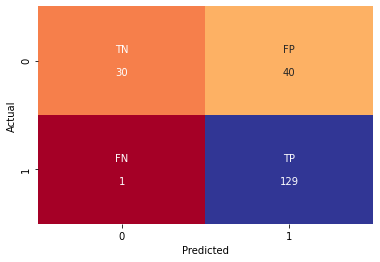

In [20]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [24]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service. NO NO NO",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8493)
[1 0 1]


## Text classification using BernoulliNB

In [73]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1))
features = tfidf.fit_transform(X).toarray()

In [74]:
features.shape

(1000, 8493)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [76]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [77]:
bnb.score(X_train,y_train)

0.83875

In [78]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 31  39]
 [ 12 118]]


Text(0.5, 15.0, 'Predicted')

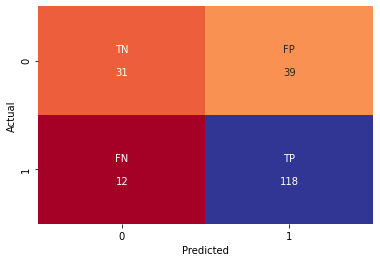

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")